# Coded By Moaz Nabil


#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [40]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
path = os.path.join(os.getcwd(), 'Salaries.csv')
df = pd.read_csv(path)
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


1. **Basic Data Exploration**

In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
columns = np.shape(df)[1]
columns

13

In [4]:
rows = np.shape(df)[0]
rows

148654

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


2. **Descriptive Statistics**

In [7]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

3. **Data Cleaning**

In [62]:
df.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
Departments             0
dtype: int64

Notes & Status columns all NAN values so we will remove them.

BasePay & Benefits columns we will take the mean to replace NAN values

In [52]:
df = df.drop('Notes', axis=1)

In [53]:
df = df.drop('Status', axis=1)

In [64]:
mean_value_BasePay = df['BasePay'].mean()
mean_value_Benefits = df['Benefits'].mean()

In [66]:
df['BasePay'].fillna(value=mean_value_BasePay, inplace=True)
df['Benefits'].fillna(value=mean_value_Benefits, inplace=True)

In [70]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         4
OtherPay            4
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Departments         0
dtype: int64

4. **Basic Data Visualization**

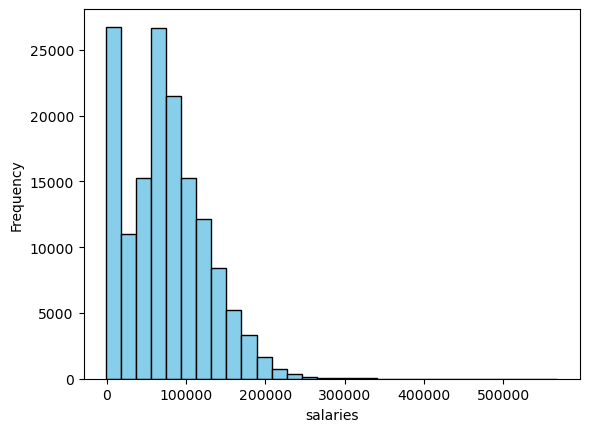

In [80]:
plt.hist(df['TotalPay'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.show()

'use pie charts to represent the proportion of employees in different departments'.

for this task i didn't find column departments in the csv file.

so i make a new column named it Departments
and used spacy library to find text similarities with JobTitle column

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [82]:
Departments = ['Human Resources', 'Finance', 'Public Relations', 'Operations',
               'Security and Safety ','Information Technology', 
               'Emergency Services', 'Facilities Management', 'Logistics and Supply Chain',
               'Legal Affairs and Compliance', 'Health ']
Departments_nlp = []
for department in Departments:
    Departments_nlp.append(nlp(department))
    

In [35]:
Departments_nlp

[Human Resources,
 Finance,
 Public Relations,
 Operations,
 Security and Safety ,
 nformation Technology,
 Emergency Services,
 Facilities Management,
 Logistics and Supply Chain,
 Legal Affairs and Compliance,
 Health ]

In [36]:
JobTitle = np.array(df['JobTitle'])
Title_nlp = lambda Title: nlp(Title)


In [37]:
JobTitle_nlp = np.vectorize(Title_nlp)(JobTitle)

In [81]:
#function to find text similarity between JobTitle and department and returns department name with highest text similarity
def our_department(title):
    similarities = []
    for department in Departments_nlp:
        similarities.append(title.similarity(department))
        
        
    similarities_arr = np.array(similarities)
    department_idx = np.argmax(similarities_arr)
    department = Departments[department_idx]
    return department

In [45]:
Departments_ = np.vectorize(our_department)(JobTitle_nlp)

C:\Users\moazn\AppData\Local\Temp\ipykernel_24416\1154909902.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarities.append(title.similarity(department))


In [55]:
df['Departments'] = Departments_

In [56]:
df['Departments'].unique()

array(['Logistics and Supply Chain', 'Emergency Services',
       'Facilities Management', 'Operations', 'nformation Technology',
       'Finance', 'Public Relations', 'Human Resources',
       'Legal Affairs and Compliance', 'Health ', 'Security and Safety '],
      dtype=object)

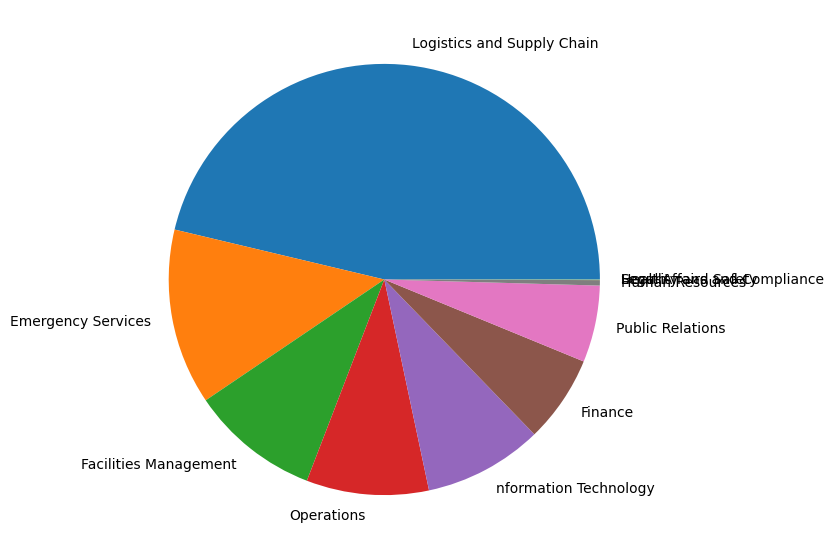

In [57]:
df['JobTitle'].unique().shape
fig = plt.figure(figsize=(10, 7))
plt.pie(df['Departments'].value_counts(), labels=df['Departments'].unique())
plt.show()

In [58]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Departments
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,Logistics and Supply Chain
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,Emergency Services
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,Emergency Services
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,Facilities Management
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,Facilities Management


5. **Grouped Analysis**

In [59]:
df.groupby('Departments')['TotalPay'].agg({'mean', 'std'})

,mean,std
Departments,,
Emergency Services,74567.670886,48622.738021
Facilities Management,68862.031475,46930.965351
Finance,85948.835345,56369.400436
Health,64196.149744,53916.927257
Human Resources,60489.641781,43027.585869
Legal Affairs and Compliance,87118.970769,27775.988530
Logistics and Supply Chain,81589.975234,54635.166996
Operations,42857.168905,29405.456128
Public Relations,88612.350260,55308.719668


6. **Simple Correlation Analysis**

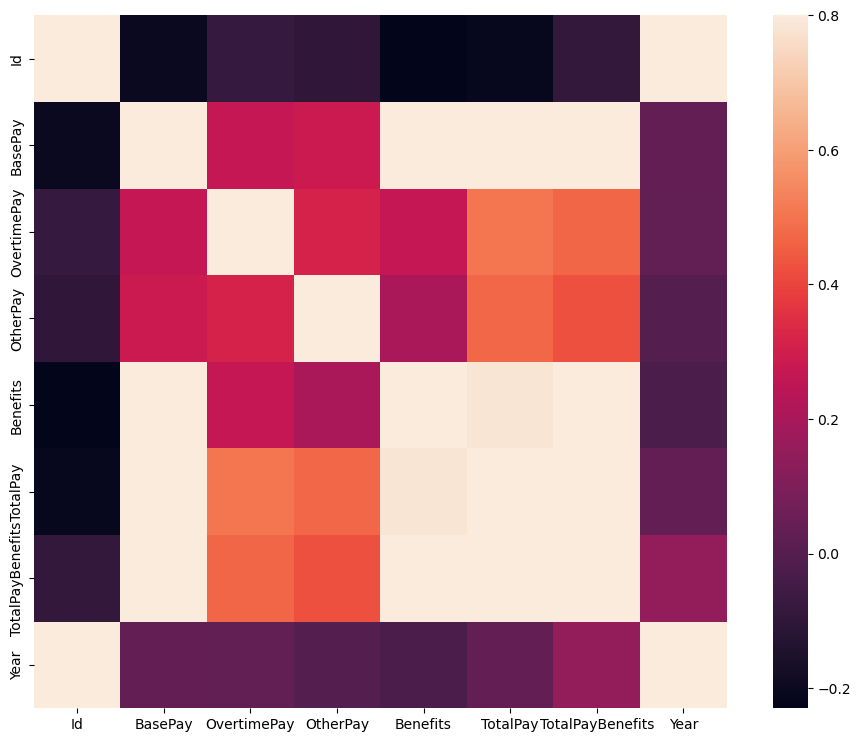

In [88]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

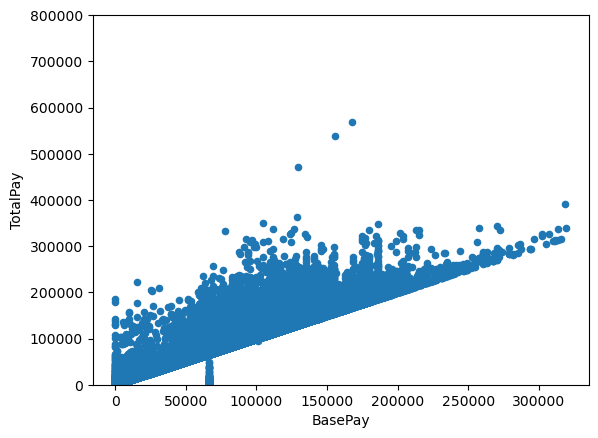

In [85]:
#scatter plot
df.plot.scatter(x='BasePay', y='TotalPay', ylim=(0,800000));

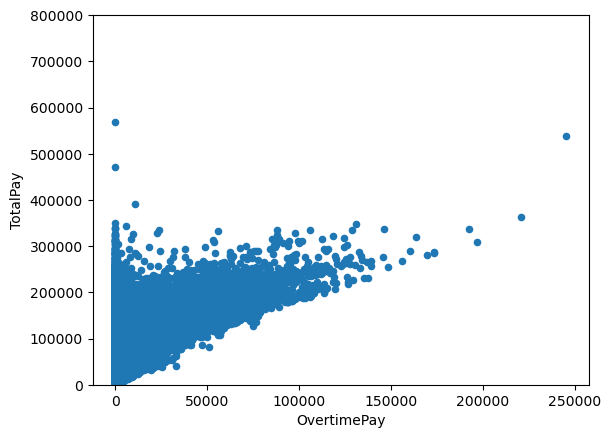

In [89]:
df.plot.scatter(x='OvertimePay', y='TotalPay', ylim=(0,800000));

7. **Summary of Insights**

it's obvious that the columns BasePay	OvertimePay	OtherPay	TotalPay	TotalPayBenefits have strong relation almost linear.


# Good Luck!